# Step 1: 1D Linear Convection

The first step in this journey begins with a simple equation called the 1-D Linear Convection equation. It is the most basic model that we can use to learn something useful about CFD.
Here it is:

$$ \frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0 $$

This equation can be uderstood as a representation of a *wave* that propagates whatever initial shape it had at a constant speed `c` without changing it. Assuming initial condutions to be $ u(x,0) = u_0(x) $ we can find an exact solution to this equation of the type $ u(x,t) = u_0(x-ct) $. Which represents the behavior of a wave being propagated with no change in shape. 

But we must discretize the above equation before we can work with it on our computer. To do so we perform a discretization in both space and time using the Forward Difference scheme for the tiem derivative and the backward difference scheme for the spatial derivative. 

This means that from now on we will consider space to have been discretized into **x** points that we index with i= 0 to **N** and step time in discrete intervals of size $ \Delta t$.

Performing a taylor series approximation with a forward difference in time and eliminating the higher order terms we can obtain a discretization for the time derivative:

$$ \frac{\partial u}{\partial t} \approx \frac{u_i^{n+1} - u^n_i}{\Delta t} $$

And similarly for the spatial with a backwards difference:

$$ \frac{\partial u}{\partial x} \approx \frac{u_{i}^{n} - u^n_{i-1}}{\Delta t} $$

Combining and substituting into our equation:

$$\frac{u_i^{n+1} - u^n_i}{\Delta t} + c \frac{u_{i}^{n} - u^n_{i-1}}{\Delta t} = 0$$

Our initial condition information will be enough to solve for everything in the above equation except $u_i^{n+1}$ so we can rearrange to solve as such:

$$ u_i^{n+1} = u^n_i - c \frac{\Delta t}{\Delta x}(u_i^n - u^n_{i-1}) $$

Now that we have fully defined the equation, discretized it and found an expression that we can easily solve for we are going to implement it in python. 

### Libraries

In [1]:
# Adding inline command to make plots appear under comments
import numpy as np
import matplotlib.pyplot as plt
import time, sys
%matplotlib inline      

### Key Variables

Before beginning to calculate we must first define the grid of points that will characterize our spatial domain. We begin by giving it a `grid_length` parameter that defines the length of our spatial domain. Next, `grid_points` will define the number of points in the grid and `dx` will be the resulting distance between any pair of adjacent grid points. `nt` will represent the number of timesteps we want to calculate and `dt` represents the amount of time each timestep will cover. Finally `c` will represent the wave speed of our system. 

In [2]:
grid_length = 10
grid_points = 41
dx = grid_length / (grid_points - 1) 
nt = 400
dt = 0.025
c = 1

### Initial Conditions

Next we set up our initial conditions for the wave. $ u = 1 $ everywhere except:

$$ u = 2 \Rightarrow 0.5 <= x <= 1 $$

In [3]:
u = np.ones(grid_points)
u[int(.5/ dx):int(1 / dx + 1)] = 2
print(u)

[1. 1. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### Plotting initial conditions



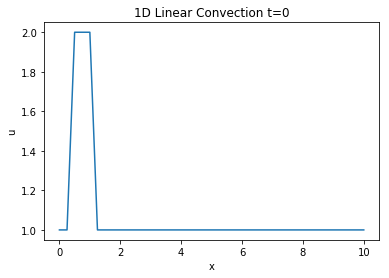

In [4]:
plt.plot(np.linspace(0,grid_length,grid_points), u);
plt.xlabel('x')
plt.ylabel('u')
plt.title('1D Linear Convection t=0');

## Applying the discretization

For every element of the array `u` we must apply the equation $ u_i^{n+1} = u^n_i - c \frac{\Delta t}{\Delta x}(u_i^n - u^n_{i-1}) $ and store the results in a new temporary array called `new_u` which will become the solution for the next time step. We will repeat this operation for every time step and see how far the wave has moved.



In [5]:
un = np.ones(grid_points)

for n in range(nt): #Runs however many timesteps you set earlier
    un = u.copy()   #copy the u array to not overwrite values
    for i in range(1,grid_points):
        u[i] = un[i] - c * dt/dx * (un[i]-un[i-1]) 

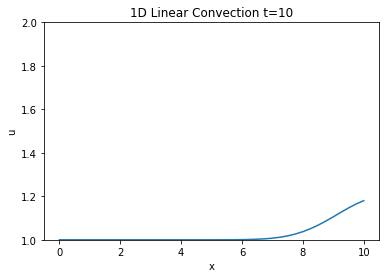

In [6]:
plt.plot(np.linspace(0,grid_length,grid_points), u);
plt.ylim(1,2);
plt.xlabel('x')
plt.ylabel('u')
plt.title('1D Linear Convection t=10');

### Results

As we can see above the wave has indeed been transported from its initial position at around 2 towards 10 and is currently halfway out of the plot. However it has lost its square wave shape. Because I was having a hard time understanding how that happened I thought an animation of each timestep would be a good way to see how the wave has been transported over time and how its shape changed.


## Animating the wave moving

To animate the moving of the wave and be able to interact a bit with it in this jupyter notebook I followed a [fantastic guide](http://tiao.io/posts/notebooks/embedding-matplotlib-animations-in-jupyter-as-interactive-javascript-widgets/) by Louis Tiao that outlines the process in detail. The following code was taken from that guide and aims to set up the figure object that contains the animation while also re-initializing the U array back to its initial square-wave configuration.

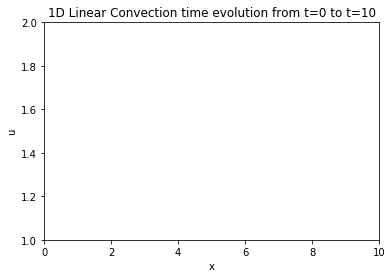

In [7]:
#Imports for animation and display within a jupyter notebook
from matplotlib import animation, rc 
from IPython.display import HTML

#Generating the figure that will contain the animation
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
ax.set_xlim(( 0, grid_length))
ax.set_ylim((1, 2))
line, = ax.plot([], [], lw=2)
plt.xlabel('x')
plt.ylabel('u')
plt.title('1D Linear Convection time evolution from t=0 to t=10');
#Resetting the U wave back to initial conditions
u = np.ones(grid_points)
u[int(.5/ dx):int(1 / dx + 1)] = 2

In [8]:
#Initialization function for funcanimation
def init():
    line.set_data([], [])
    return (line,)

In [9]:
#Main animation function, each frame represents a time step in our calculation
def animate(j):
    x = np.linspace(0, grid_length, grid_points)
    un = u.copy()   #copy the u array to not overwrite values
    for i in range(1,grid_points):
        u[i] = un[i] - c * dt/dx * (un[i]-un[i-1]) 
    line.set_data(x, u)
    return (line,)

In [10]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=nt, interval=20)
HTML(anim.to_jshtml())

## Conclusion

The above animation can be played forwards or backwards in time and illustrates the behaviour of our numerical linear convection simulation over each time step. This behaviour is not exactly what we expected since the initial conditions are not being moved along the wave since the shape is not perfectly preserved. Truncation error is the most likely culprit as to why there are loses over time of the original condition and will be a topic discussed on the first bonus lecture.

 Next we will look at nonlinear convection using the same set of tools.